In [2]:
from pymongo import MongoClient
import numpy as np
import base64
from cpsdriver.codec import DocObjectCodec
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

In [3]:
try:
    client = MongoClient('localhost:27017')
except pymongo.errors.ConnectionFailure as e:
    print(e)

In [4]:
client.database_names()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  """Entry point for launching an IPython kernel.


['admin', 'config', 'cps-test-01', 'local']

In [5]:
db = client['cps-test-01']

In [9]:
# explore plate_data           

plate_data = db['plate_data']
print (plate_data.count())
item = plate_data.find_one()
# print(item)

sample = [None,None,None,None,None,None]

for item in plate_data.find():
    gondola_id = item['gondola_id']
    
    plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
    date_time = item['date_time']
    timestamp = plate_data_item.timestamp # seconds since epoch
    np_data = plate_data_item.data
    sample[gondola_id] = np_data
    print('gondola', gondola_id, 'plate_data shape', np_data.shape, 'date_time',date_time,'ts', timestamp)

# time x shelf x plate

c:\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """


842
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.089647
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.092723
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.107000 ts 1580250245.103084
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.158000 ts 1580250245.15582
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.200000 ts 1580250245.19951
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.293000 ts 1580250245.291311
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.296000 ts 1580250245.294285
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.302000 ts 1580250245.301375
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.359000 ts 1580250245.357504
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.397000 ts 1580250245.395687
gondola 5 plate_data shape (

gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.069000 ts 1580250251.700325
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.080000 ts 1580250251.750095
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:12.087000 ts 1580250251.794736
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:12.094000 ts 1580250251.890091
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.096000 ts 1580250251.889993
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.099000 ts 1580250251.899161
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.104000 ts 1580250251.952878
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:12.107000 ts 1580250252.001343
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:12.109000 ts 1580250252.090824
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:12.122000 ts 1580250252.092032
gondola 4 plate_data shape (12

gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.090000 ts 1580250258.089177
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:18.091000 ts 1580250258.090477
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.107000 ts 1580250258.099092
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.148000 ts 1580250258.146361
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:18.199000 ts 1580250258.197615
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:18.334000 ts 1580250258.291746
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.496000 ts 1580250258.294083
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.548000 ts 1580250258.302453
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:18.581000 ts 1580250258.34643
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:18.584000 ts 1580250258.399986
gondola 3 plate_data shape (12,

gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.301000 ts 1580250264.299379
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.302000 ts 1580250264.301848
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.349000 ts 1580250264.347177
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:24.402000 ts 1580250264.401349
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.492000 ts 1580250264.490438
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:24.494000 ts 1580250264.493014
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.502000 ts 1580250264.498998
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:24.550000 ts 1580250264.545493
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:24.597000 ts 1580250264.594936
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:24.695000 ts 1580250264.690312
gondola 5 plate_data shape (12

gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:31.295000 ts 1580250271.289798
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.296000 ts 1580250271.293506
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.315000 ts 1580250271.302832
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.348000 ts 1580250271.346539
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:31.396000 ts 1580250271.393225
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.505000 ts 1580250271.491409
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:31.518000 ts 1580250271.492945
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.588000 ts 1580250271.501832
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:31.589000 ts 1580250271.548075
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:31.672000 ts 1580250271.601673
gondola 5 plate_data shape (12

In [10]:
# aggregate weight per shelf
# compute moving mean and variance

def init_2D_array(dim1, dim2):
    array = np.array( [ [None for i in range(dim2)] for j in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            array[i][j] = []
    return array

def init_1D_array(dim):
    array = np.array( [None for i in range(dim) ],
                    dtype=object)
    for i in range(dim):
        array[i] = []
    return array

def get_weights_per_shelf(number_gondolas=5, number_shelves=6):
    weight_mean = init_2D_array(number_gondolas, number_shelves)
    weight_std = init_2D_array(number_gondolas, number_shelves)
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)
    
    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_data = plate_data_item.data # [time,shelf,plate]
        np_data = np_data[:,1:13,1:13] # remove NaN elements
        
        # sum plates per shelf
        np_shelf = np_data.sum(axis=2) # [time,shelf]
        np_shelf = np_shelf.transpose() # [shelf, time]
        
        # get mean/std for weights per 12 data points (0.2 seconds)
        mean = np.mean(np_shelf, axis=1)
        std = np.std(np_shelf, axis=1)
        
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        number_shelves= len(mean)
        for i in range(number_shelves):
            weight_mean[gondola_id - 1][i].append(mean[i])
            weight_std[gondola_id - 1][i].append(std[i])
    return weight_mean,weight_std,timestamps,date_times

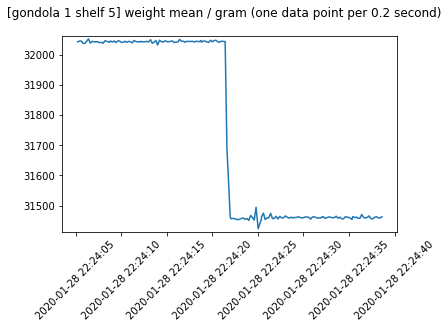

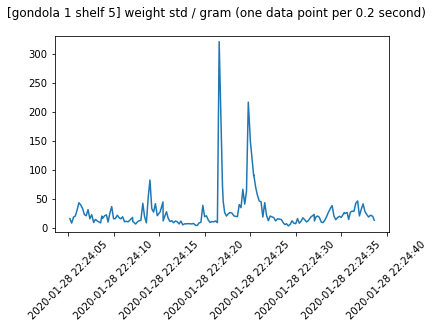

In [257]:
# plot moving mean and var

def plot_data(data, date_time, title=None):
    assert len(data) == len(date_time)
#     print (data)
    fig = plt.figure()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=45 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
#     print (min(data))
    ax.set_ylim([min(data)-10, max(data)+10])
    plt.plot(date_time,data)
    fig.suptitle(title)
    plt.show()
weight_mean,weight_std,timestamps,date_times = get_weights_per_shelf()
# print (weight_mean.shape)
# print (weight_std.shape)
# print (timestamps.shape)
# print (date_times.shape)

plot_gondola_id = 1
plot_shelf_id = 5
title = '[gondola %d shelf %d] weight mean / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_mean[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)
title = '[gondola %d shelf %d] weight std / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_std[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)

In [258]:
# detect weights events

def detect_weight_events(weight_mean, weight_std, date_times, thresholds={'std': 40, 'mean': 10}):
    events = []
    num_gondola, num_shelf = weight_mean.shape
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_std[gondola_id][shelf_id]) > thresholds.get('std', 60)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,}
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 

In [259]:
detect_weight_events(weight_mean, weight_std, date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 23, 208000),
  'n_begin': 76,
  'n_end': 90,
  'delta_weight': -592.1953,
  'gondola': 1,
  'shelf': 5},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 9, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 12, 613000),
  'n_begin': 21,
  'n_end': 37,
  'delta_weight': -10.1796875,
  'gondola': 1,
  'shelf': 6},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 12, 107000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 16, 794000),
  'n_begin': 34,
  'n_end': 58,
  'delta_weight': 13.074219,
  'gondola': 1,
  'shelf': 6}]